In [1]:
import os
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from Final_Model import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)
sklearn.set_config(print_changed_only=True)

d:\Anaconda\envs\pytorch\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<font size=10> Loading Dataset

In [2]:
train_path = 'input/inputTrain.csv'
train_df = pd.read_csv(train_path)
train_df.drop(columns=['Unnamed: 0', 'carid'], inplace=True)
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
tradeTime,0.840336,0.827731,0.802521,0.844538,0.848739,0.756303,0.789916,0.920168,0.974790,0.718487,...,0.802521,-0.655462,0.873950,0.235294,0.546218,0.701681,-0.798319,-0.310924,-0.130252,-0.012605
mileage,-0.534415,0.315772,1.028558,-0.089701,-0.154414,0.810883,0.082312,-0.379565,1.083441,-0.204128,...,-0.637535,-0.402953,0.100099,0.056000,-0.136970,0.538139,0.680581,0.478198,0.441610,-0.558113
color_1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
color_2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
color_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6,0.668317,-0.049505,-0.222772,1.074257,0.574257,-0.198020,0.222772,-0.148515,-0.143564,-0.173267,...,0.985149,0.841584,-0.074257,0.970297,1.014851,0.396040,-0.049505,0.099010,-0.198020,-0.168317
l7,-1.175993,-0.271037,-0.715401,-0.235116,-0.813323,-1.280552,-1.730886,-0.130919,-0.499289,-0.334701,...,0.454206,0.105606,-0.430253,0.416118,0.167502,-1.196486,0.693357,-0.568485,0.480517,0.405306
l8,-0.247441,-0.252904,-0.604505,0.635244,-0.169895,-0.937574,-0.769392,-0.273900,-0.481734,-0.475091,...,0.941090,0.705644,-0.333004,0.940380,0.847939,-0.369935,0.270279,-0.047498,0.040985,-0.002290
l9,0.229515,-0.226296,-0.531781,0.918661,0.311352,-0.627546,-0.475458,-0.273810,-0.352787,-0.290792,...,1.062477,0.741570,-0.313537,1.007418,0.964963,-0.112968,0.009225,-0.362698,-0.199016,-0.164260


In [3]:
test_path = 'input/inputTest.csv'
test_df = pd.read_csv(test_path)
test_df.drop(columns=['Unnamed: 0', 'carid'], inplace=True)
test_df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
tradeTime,1.218487,1.037815,1.273109,1.235294,1.016807,1.105042,1.008403,1.151261,1.151261,0.983193,...,1.331933,1.285714,0.991597,1.306723,1.470588,1.352941,1.075630,1.121849,1.357143,1.130252
mileage,0.017225,0.237196,0.516128,-1.092178,0.082312,0.741959,0.120813,-0.093420,-0.154414,1.136838,...,-0.112177,0.270042,-0.560773,0.303458,-0.243217,0.306204,0.619421,0.609669,-0.058507,0.302082
color_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
color_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
color_3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6,1.207921,-0.410891,-0.371287,1.064356,-0.103960,-0.118812,-0.123762,0.742574,0.346535,1.163366,...,0.603960,-0.148515,0.569307,1.316832,-0.287129,1.014851,-0.049505,-0.074257,0.717822,-0.029703
l7,0.940360,-2.289283,-1.126469,0.028137,0.595970,0.989269,0.489510,-0.698732,-0.353454,0.457001,...,-0.441435,-0.570470,-1.264763,0.257097,0.412576,0.273699,-0.093705,0.232893,-1.391831,0.470126
l8,1.467529,-1.982000,-0.901179,0.897740,0.169346,0.315245,0.002260,-0.039089,-0.173634,1.294847,...,-0.023012,-0.539777,-0.483993,1.196871,-0.202582,1.203820,-0.078510,0.069908,-0.412409,0.151640
l9,1.389959,-0.815143,-0.813486,0.894818,-0.066969,0.047154,-0.037038,0.568475,0.302218,1.076063,...,0.533565,-0.363426,0.205133,1.258689,-0.198616,0.756881,-0.243119,-0.179408,0.269072,-0.011108


In [4]:
X = train_df.drop(columns='price').to_numpy()
y = train_df['price'].values

In [5]:
tX = test_df.drop(columns='price').to_numpy()

<font size=10> Define Scoring Criterion

In [6]:
def criterion(pred, y):
    dy = np.abs(pred - y) / y
    mape = np.sum(dy) / len(pred)
    acc = len(dy[dy <= 0.05]) / len(pred)
    return 0.2 * (1 - mape) + 0.8 * acc

<font size=10> Evaluate Performance

<font size=5> Evaluate Accuracy

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
model = Model()
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
criterion(pred_y, y_test)

Fitting Models:


100%|██████████| 7/7 [02:09<00:00, 18.56s/it]


Model Predicting:


100%|██████████| 7/7 [00:00<?, ?it/s]


0.8573840677479426

In [8]:
np.array(np.exp(pred_y) - 1)[0:20]

array([ 9.7104313 , 12.35779242,  5.78127714, 11.46217744, 12.42765315,
        4.85910346,  6.98510778, 20.52816693,  5.10517738,  8.51817814,
       13.8341066 , 15.15117395,  5.08933466,  3.45745019,  3.4037883 ,
        4.25591539, 20.96038723,  5.6465567 ,  7.9601934 , 12.45879586])

In [9]:
np.array(np.exp(y_test) - 1)[0:20]

array([ 9.8 , 12.18,  5.58, 11.8 , 12.18,  5.68,  6.6 , 18.8 ,  5.5 ,
        8.98, 14.2 , 14.88,  4.69,  3.54,  4.41,  3.98, 21.58,  6.38,
        8.98, 13.2 ])

In [10]:
mse(np.exp(pred_y) - 1, np.exp(y_test) - 1)

78.75954465191406

In [11]:
mae(np.exp(pred_y) - 1, np.exp(y_test) - 1)

1.0884714336576509

<font size=5> Evaluate Prediction Distribution

<font size=3> Training Set Distribution

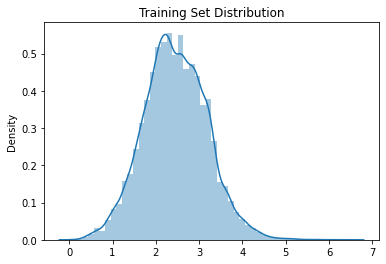

In [12]:
sns.distplot(y)
plt.title("Training Set Distribution")
plt.show()

<font size=3> Prediction Distribution

Fitting Models:


100%|██████████| 7/7 [02:48<00:00, 24.06s/it]


Model Predicting:


100%|██████████| 7/7 [00:00<00:00, 7010.54it/s]


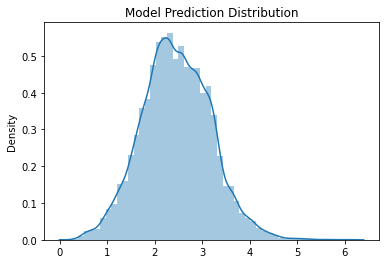

In [13]:
model = Model()
model.fit(X, y)
pred_y = model.predict(X)
sns.distplot(pred_y)
plt.title("Model Prediction Distribution")
plt.show()

<font size=10> Make Prediction

In [14]:
model = Model()
model.fit(X, y)
ty = model.predict(tX)

Fitting Models:


100%|██████████| 7/7 [02:47<00:00, 23.97s/it]


Model Predicting:


100%|██████████| 7/7 [00:00<00:00, 7018.92it/s]


In [15]:
ty = np.round(np.exp(ty) - 1, 4)
ty

array([17.0087,  9.468 ,  2.2532, ...,  6.1988,  2.2756, 12.9147])

In [16]:
test_df['price'] = ty
test_df['carid'] = pd.read_csv(test_path)['carid'].values
order = list(test_df.columns)
order.remove('carid')
order.insert(0, 'carid')
test_df = test_df[order]
test_df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
carid,3.000000,4.000000,8.000000,9.000000,11.000000,15.000000,17.000000,19.000000,21.000000,27.000000,...,30403.000000,59448.000000,7270.000000,32748.000000,63256.000000,55510.000000,1768.000000,20723.000000,15625.000000,51844.000000
tradeTime,1.218487,1.037815,1.273109,1.235294,1.016807,1.105042,1.008403,1.151261,1.151261,0.983193,...,1.331933,1.285714,0.991597,1.306723,1.470588,1.352941,1.075630,1.121849,1.357143,1.130252
mileage,0.017225,0.237196,0.516128,-1.092178,0.082312,0.741959,0.120813,-0.093420,-0.154414,1.136838,...,-0.112177,0.270042,-0.560773,0.303458,-0.243217,0.306204,0.619421,0.609669,-0.058507,0.302082
color_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
color_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6,1.207921,-0.410891,-0.371287,1.064356,-0.103960,-0.118812,-0.123762,0.742574,0.346535,1.163366,...,0.603960,-0.148515,0.569307,1.316832,-0.287129,1.014851,-0.049505,-0.074257,0.717822,-0.029703
l7,0.940360,-2.289283,-1.126469,0.028137,0.595970,0.989269,0.489510,-0.698732,-0.353454,0.457001,...,-0.441435,-0.570470,-1.264763,0.257097,0.412576,0.273699,-0.093705,0.232893,-1.391831,0.470126
l8,1.467529,-1.982000,-0.901179,0.897740,0.169346,0.315245,0.002260,-0.039089,-0.173634,1.294847,...,-0.023012,-0.539777,-0.483993,1.196871,-0.202582,1.203820,-0.078510,0.069908,-0.412409,0.151640
l9,1.389959,-0.815143,-0.813486,0.894818,-0.066969,0.047154,-0.037038,0.568475,0.302218,1.076063,...,0.533565,-0.363426,0.205133,1.258689,-0.198616,0.756881,-0.243119,-0.179408,0.269072,-0.011108


In [17]:
test_df.to_csv('final submission.csv')